In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### ML Process (Linear Regression)
    1. data load

In [2]:
df = pd.read_csv('./data/loan_data.csv')
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

    2. EDA : 결측치, 전처리, 시각화, insight, 통계

In [5]:
df = df[['credit.policy', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']]
df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


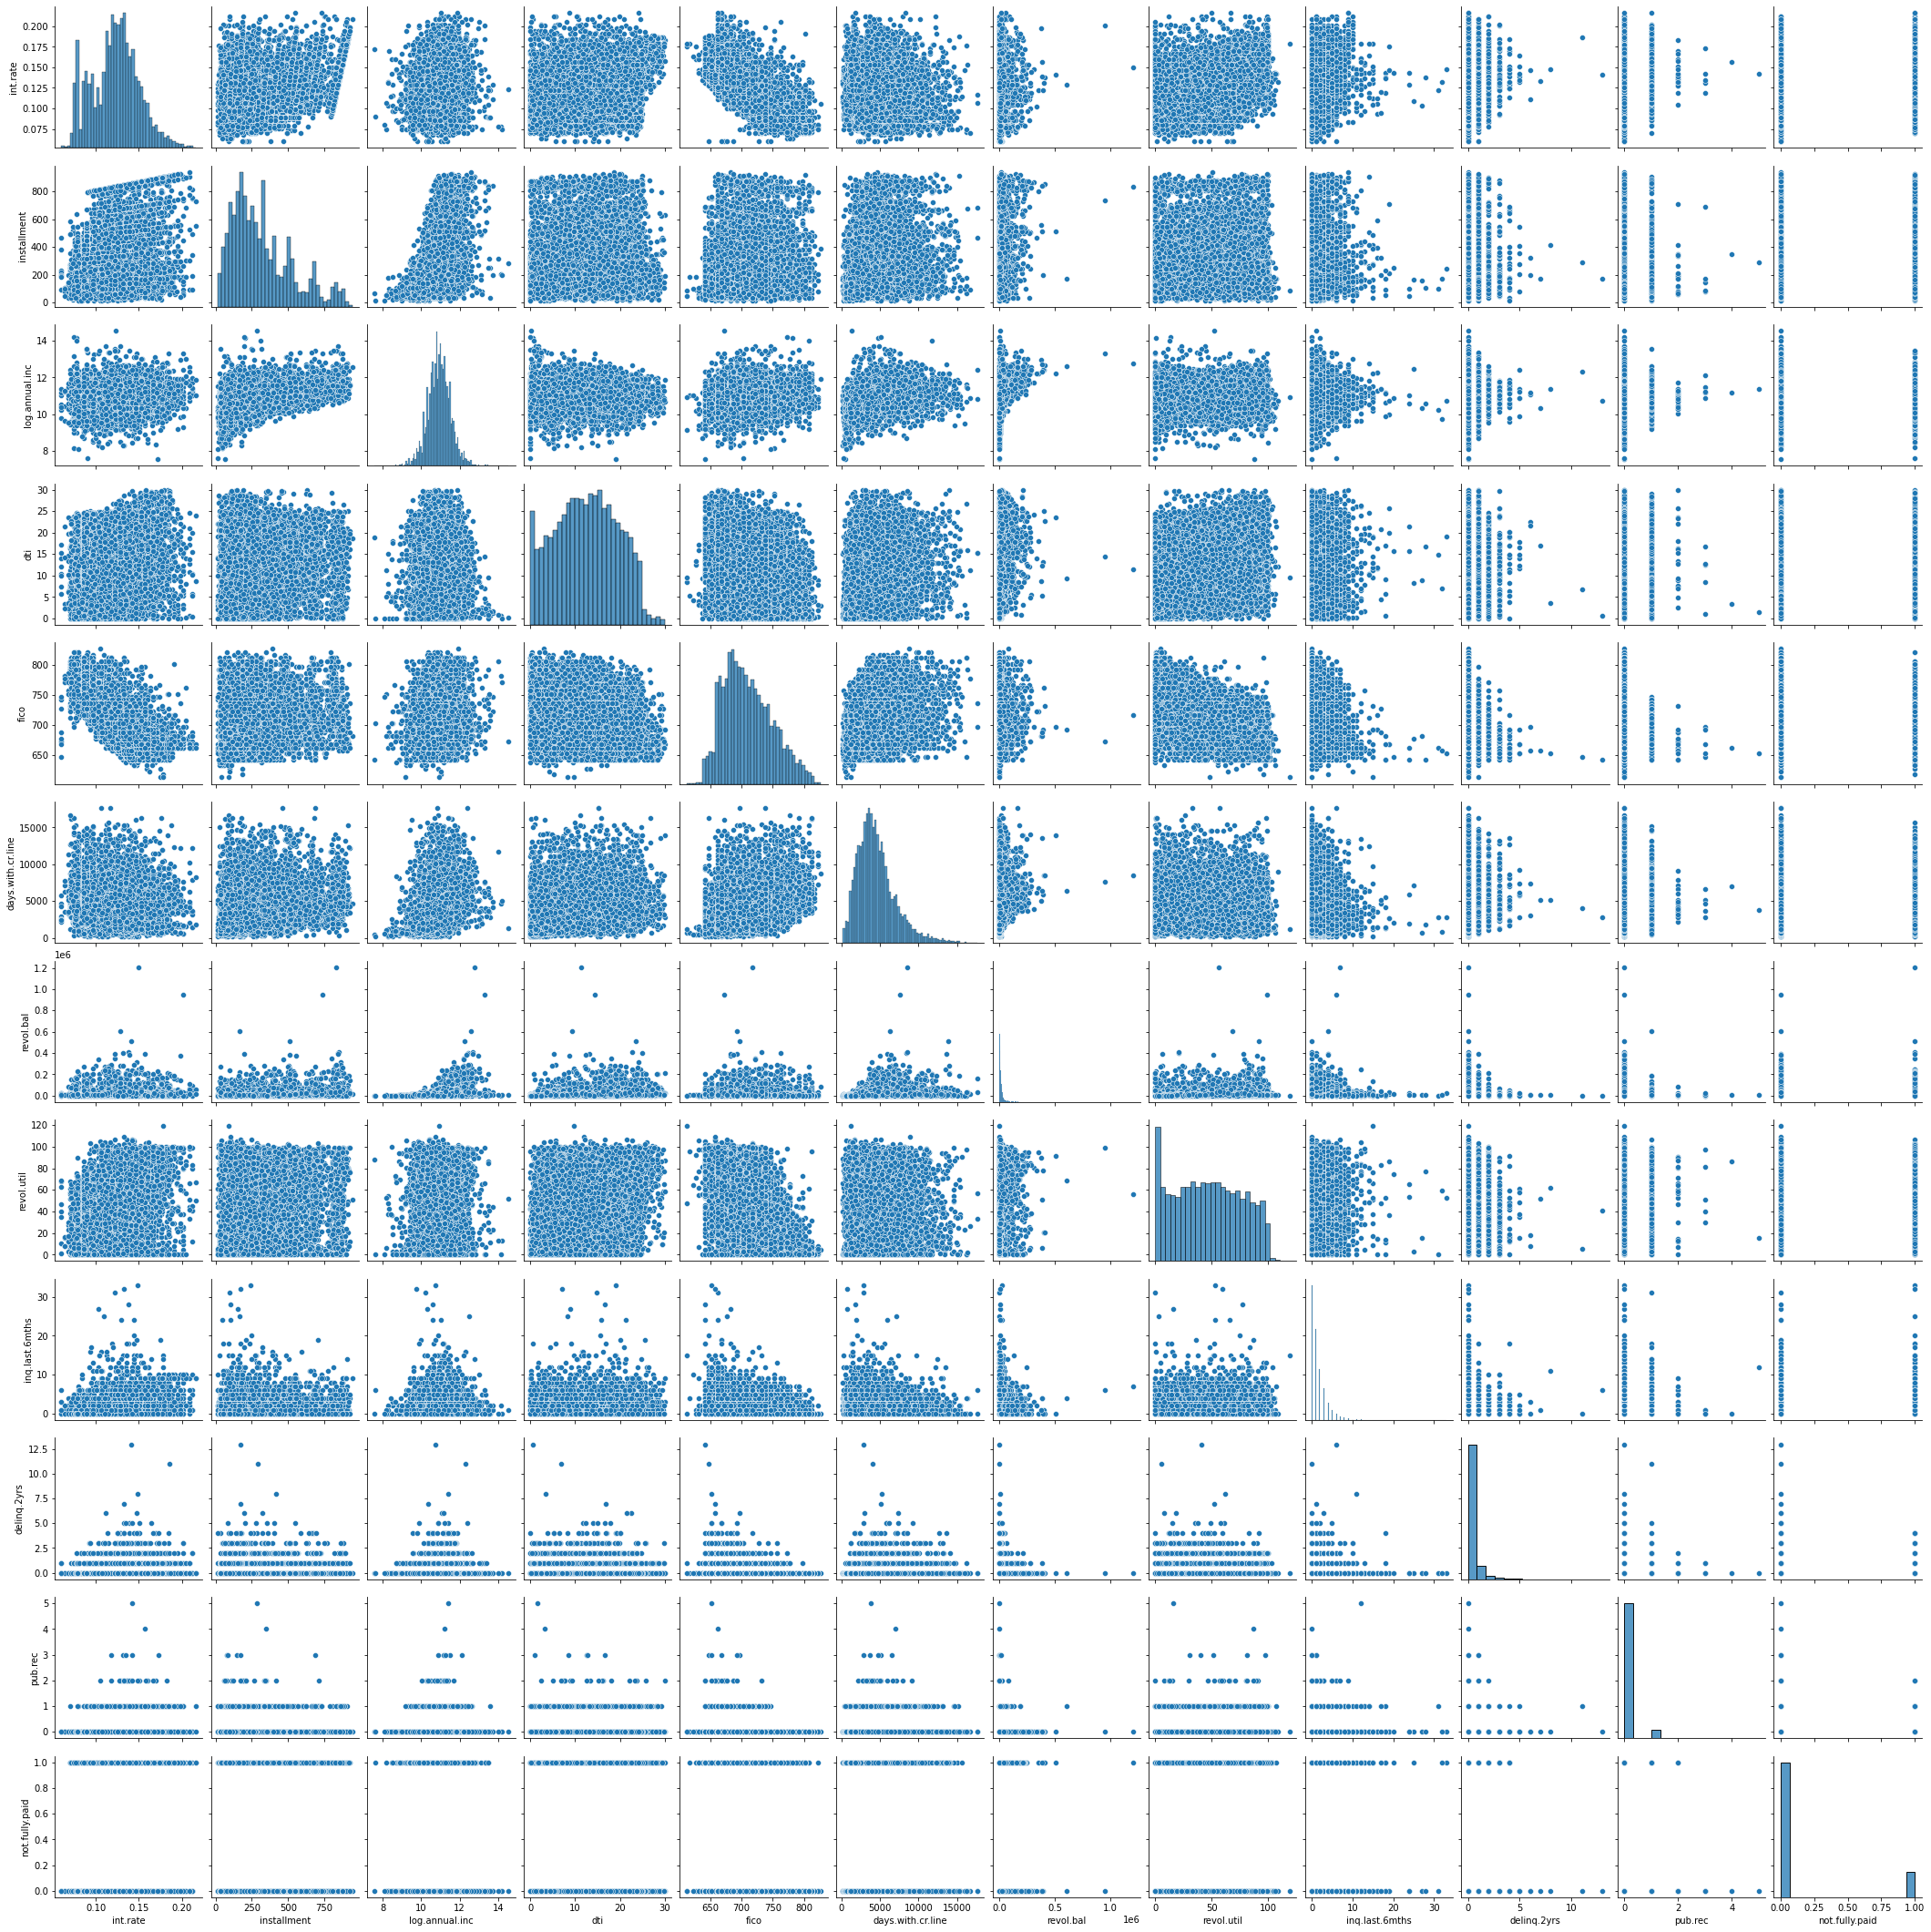

In [35]:
# sns.pairplot(df)

    3. label(y) 추출  =>  x_data / y_data를 나눔

In [6]:
x = df.drop('not.fully.paid', axis = 1)
y = df['not.fully.paid']

    4. Train Data

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3)

    5. Algorithm 가져오기(import)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
tree = DecisionTreeClassifier()

    6. Algorithm에 data를 주어서 algorithm을 학습시킨다. => fit 함수 사용

In [10]:
tree.fit(x_train, y_train)

DecisionTreeClassifier()

    7. Algorithm이 학습된 후 model을 생성

    8. Model은 예측을 할 수 있다.  => 예측을 시킴 : test Data

In [11]:
predictions = tree.predict(x_test)

    9. Model을 평가 => model이 예측한 값과 실제값을 비교 

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      2400
           1       0.19      0.19      0.19       474

    accuracy                           0.73      2874
   macro avg       0.51      0.51      0.51      2874
weighted avg       0.73      0.73      0.73      2874



In [55]:
# fully.paid 여부를 판별하는 tree model 생성하고 정확도 측정
# 어떤 요소가 
# pd.get_dummies()

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rfc = RandomForestClassifier(n_estimators = 1000)

In [83]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [84]:
preds = rfc.predict(x_test)

In [85]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2419
           1       0.44      0.02      0.03       455

    accuracy                           0.84      2874
   macro avg       0.64      0.51      0.47      2874
weighted avg       0.78      0.84      0.77      2874



In [1]:
from sklearn.model_selection import GridSearchCV

In [93]:
params = {
    'n_estimators' : [300, 500],
    'max_features' : ['auto','sqrt'],
    'max_depth' : [4,5,6]
}

In [96]:
grid = GridSearchCV(RandomForestClassifier(), param_grid = params, refit = True , verbose=True, cv = 3 )

In [97]:
grid.fit(x_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  1.1min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [300, 500]},
             verbose=True)

In [100]:
grid.best_params_

{'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 300}

In [101]:
grid.best_score_

0.839200559183976